In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("diabetes.csv")

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Check the missing values
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.duplicated().sum()

0

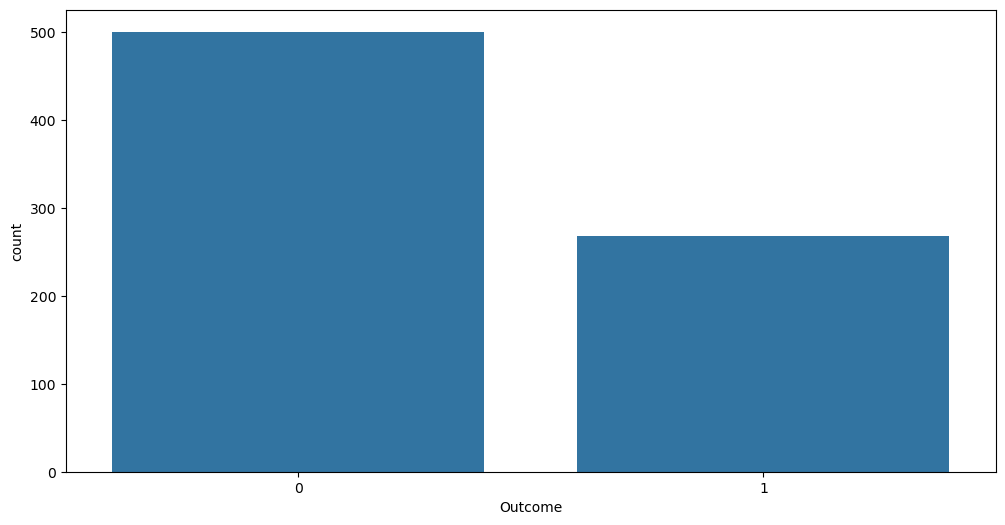

In [ ]:
#Having or not having diabetics
plt.figure(figsize = (12,6))
sns.countplot(x = 'Outcome', data = data)
plt.show()

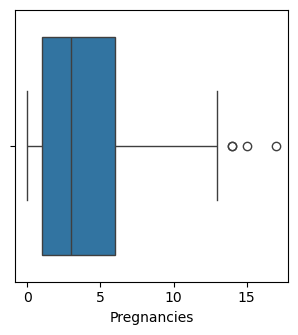

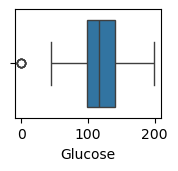

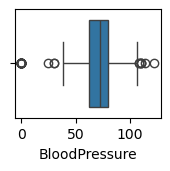

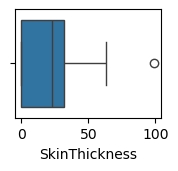

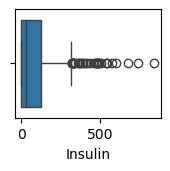

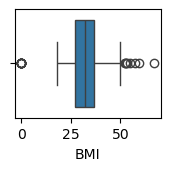

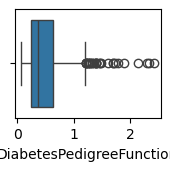

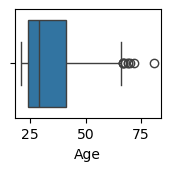

In [ ]:
plt.figure(figsize = (12,12))
for i,col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(3,3, i+1)
    sns.boxplot(x = col, data = data)
    plt.show()

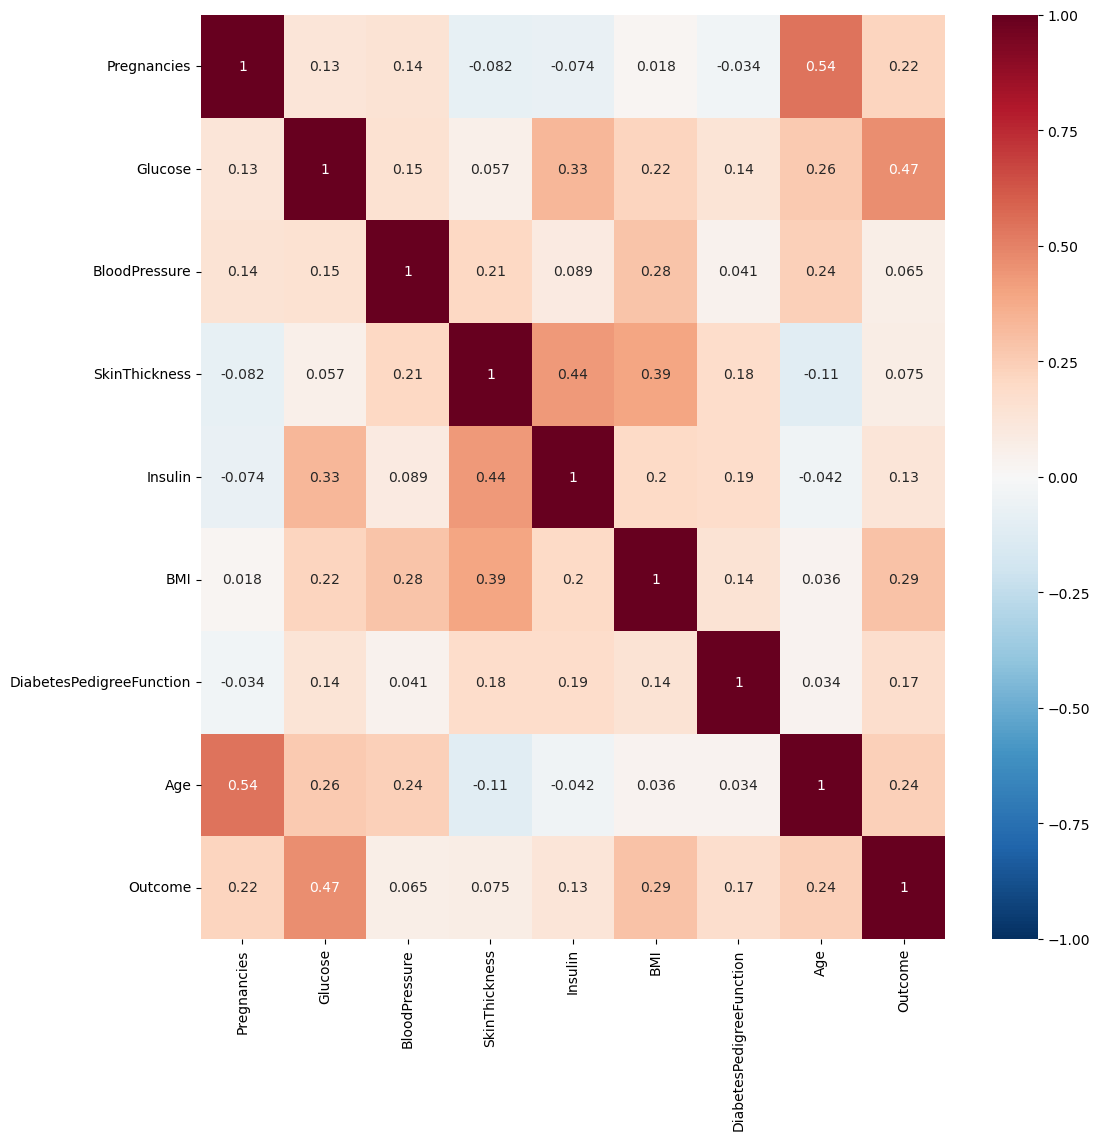

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(), vmin=-1.0, center=0, cmap='RdBu_r', annot=True)
plt.show()

In [ ]:
#Standard Scaling and Label Encoding
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(data.drop(["Outcome"],axis = 1),),
                columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])


In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [ ]:
y = data['Outcome']

In [ ]:
#Importing train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []
for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [ ]:
max_train_score = max(train_scores)
train_scores_index = [i for i, v in enumerate(train_scores) if v == max_train_score]
print("Max Train Score {} % and k = {}".format(max_train_score*100, list(map(lambda x: x+1, train_scores_index))))


Max Train Score 100.0 % and k = [1]


In [ ]:
max_test_score = max(test_scores)
test_scores_index = [i for i, v in enumerate(test_scores) if v == max_test_score]
print("Max Test Score {} % and k = {}".format(max_test_score*100, list(map(lambda x: x+1, test_scores_index))))


Max Test Score 77.92207792207793 % and k = [13]


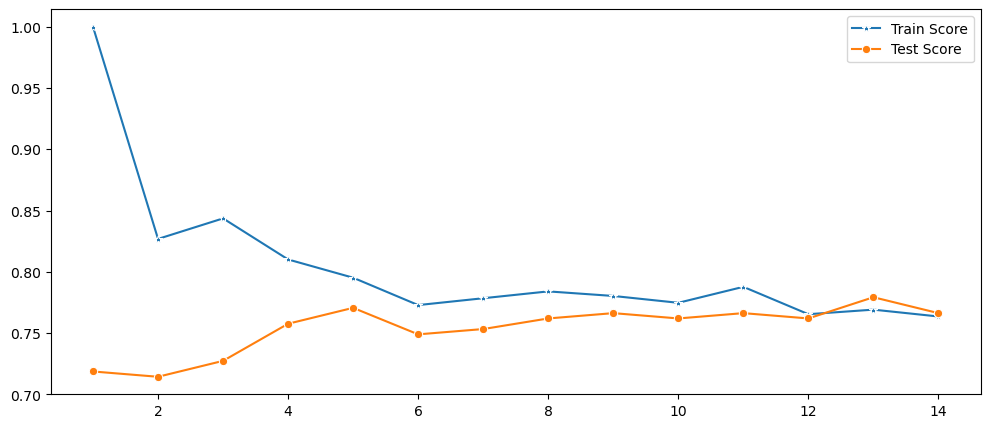

In [ ]:
plt.figure(figsize=(12, 5))
p = sns.lineplot(x=range(1, 15), y=train_scores, marker='*', label='Train Score')
p = sns.lineplot(x=range(1, 15), y=test_scores, marker='o', label='Test Score')
plt.legend()
plt.show()

In [ ]:
knn = KNeighborsClassifier(13)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7792207792207793

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[141,  16],
       [ 35,  39]], dtype=int64)

In [ ]:
def predict_diabetes(user_input):
    # Convert user input to a DataFrame with proper column names
    input_df = pd.DataFrame([user_input], columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                                                   'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

    # Scale user input
    user_input_scaled = sc_X.transform(input_df)

    # Predict using the trained KNN model
    prediction = knn.predict(pd.DataFrame(user_input_scaled, columns=input_df.columns))

    return "Diabetic" if prediction[0] == 1 else "Non-Diabetic"



In [ ]:
# Prediction according to User Inputs
#Final Output
user_input = [1, 85, 66, 29, 0, 26.6, 0.351, 31]
print("Prediction:", predict_diabetes(user_input))

Prediction: Non-Diabetic


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)  # Train the logistic regression model
y_pred_lr = log_reg.predict(X_test)  # Predict on the test set

# Evaluation
print("Logistic Regression Performance")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Performance
[[141  16]
 [ 35  39]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the ANN model
ann = Sequential()
ann.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
ann.add(Dense(units=32, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))  # Binary classification

# Compile the model
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predict on test data
y_pred_ann = (ann.predict(X_test) > 0.5).astype("int32")

# Evaluation
print("Artificial Neural Network Performance")
print(confusion_matrix(y_test, y_pred_ann))
print(classification_report(y_test, y_pred_ann))


C:\Users\VICTUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5064 - loss: 0.7452 - val_accuracy: 0.6667 - val_loss: 0.6655
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6184 - loss: 0.6579 - val_accuracy: 0.7037 - val_loss: 0.5963
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7105 - loss: 0.5900 - val_accuracy: 0.7222 - val_loss: 0.5512
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7397 - loss: 0.5516 - val_accuracy: 0.7500 - val_loss: 0.5207
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7641 - loss: 0.5146 - val_accuracy: 0.7778 - val_loss: 0.5019
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7591 - loss: 0.4997 - val_accuracy: 0.7685 - val_loss: 0.4944
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7647 - loss: 0.4726 - val_accuracy: 0.7870 - val_loss: 0.4917
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7588 - loss: 0.4702 - val_accuracy: 0.7778 - val_loss

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predictions from each model
y_pred_knn = knn.predict_proba(X_test)[:, 1]  # Probability predictions from KNN
y_pred_lr = log_reg.predict_proba(X_test)[:, 1]  # Probability predictions from Logistic Regression
y_pred_ann = ann.predict(X_test).flatten()  # Probability predictions from ANN

# Combine predictions using averaging (soft voting)
combined_prob = (y_pred_knn + y_pred_lr + y_pred_ann) / 3
y_pred_ensemble = (combined_prob > 0.5).astype(int)  # Threshold for classification

# Evaluate the ensemble
print("Ensemble Model Performance")
print(confusion_matrix(y_test, y_pred_ensemble))
print(classification_report(y_test, y_pred_ensemble))


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Ensemble Model Performance
[[141  16]
 [ 35  39]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Combine predictions using averaging (soft voting)
combined_prob = (y_pred_knn + y_pred_lr + y_pred_ann) / 3
y_pred_ensemble = (combined_prob > 0.5).astype(int)  # Threshold for classification

# Calculate accuracy
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
print("Ensemble Model Accuracy (Soft Voting): {:.2f}%".format(ensemble_accuracy * 100))

# Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ensemble))
print("Classification Report:\n", classification_report(y_test, y_pred_ensemble))


Ensemble Model Accuracy (Soft Voting): 77.92%
Confusion Matrix:
 [[141  16]
 [ 35  39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231



In [ ]:
def predict_diabetes(pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age):
    # Create a DataFrame for the input with correct feature names
    input_data = pd.DataFrame([[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age]],
                              columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
                                       'DiabetesPedigreeFunction', 'Age'])

    # Standardize the input using the scaler fitted during training
    input_data_scaled = sc_X.transform(input_data)

    # Predict using the ensemble model
    prob_knn = knn.predict_proba(input_data_scaled)[:, 1]  # KNN probability
    prob_lr = log_reg.predict_proba(input_data_scaled)[:, 1]  # Logistic Regression probability
    prob_ann = ann.predict(input_data_scaled).flatten()  # ANN probability

    # Combine probabilities (soft voting)
    combined_prob = (prob_knn + prob_lr + prob_ann) / 3
    prediction = (combined_prob > 0.5).astype(int)  # Threshold at 0.5

    return "Diabetic" if prediction[0] == 1 else "Non-Diabetic"


In [ ]:
result = predict_diabetes(1, 85, 66, 29, 0, 26.6, 0.627, 50)
print("Prediction:", result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction: Non-Diabetic


C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231

